In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv("final_cleaned_data.csv", sep=';')
df['Date'] = pd.to_datetime(df['Date'])
audio_features = df.groupby('id')[['Danceability', 'Energy', 'Loudness_norm', 'Speechiness', 
                       'Acousticness', 'Instrumentalness', 'Valence']].first().reset_index()

audio_features

In [72]:
audio_features_cols = ['Danceability', 'Energy', 'Loudness_norm', 'Speechiness', 
                       'Acousticness', 'Instrumentalness', 'Valence']


In [73]:
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(audio_features[audio_features_cols])
features_normal = pd.DataFrame(features_normal)
features_normal.columns = audio_features_cols



In [74]:
features_normal

,Danceability,Energy,Loudness_norm,Speechiness,Acousticness,Instrumentalness,Valence
0,0.740132,0.627649,0.825120,0.044492,0.131791,0.0,0.520921
1,0.843202,0.578204,0.824511,0.122881,0.004024,0.0,0.171548
2,0.307018,0.756811,0.817955,0.753178,0.082495,0.0,0.429916
3,0.305921,0.914228,0.848296,0.056144,0.001006,0.0,0.219665
4,0.599781,0.625631,0.784249,0.562500,0.288732,0.0,0.668410
...,...,...,...,...,...,...,...
9156,0.760965,0.310797,0.650210,0.061441,0.843058,0.0,0.773013
9157,0.933114,0.731584,0.822335,0.266949,0.053320,0.0,0.859833
9158,0.544956,0.534813,0.803626,0.201271,0.265594,0.0,0.049163
9159,0.717105,0.529768,0.750080,0.307203,0.284708,0.0,0.242678


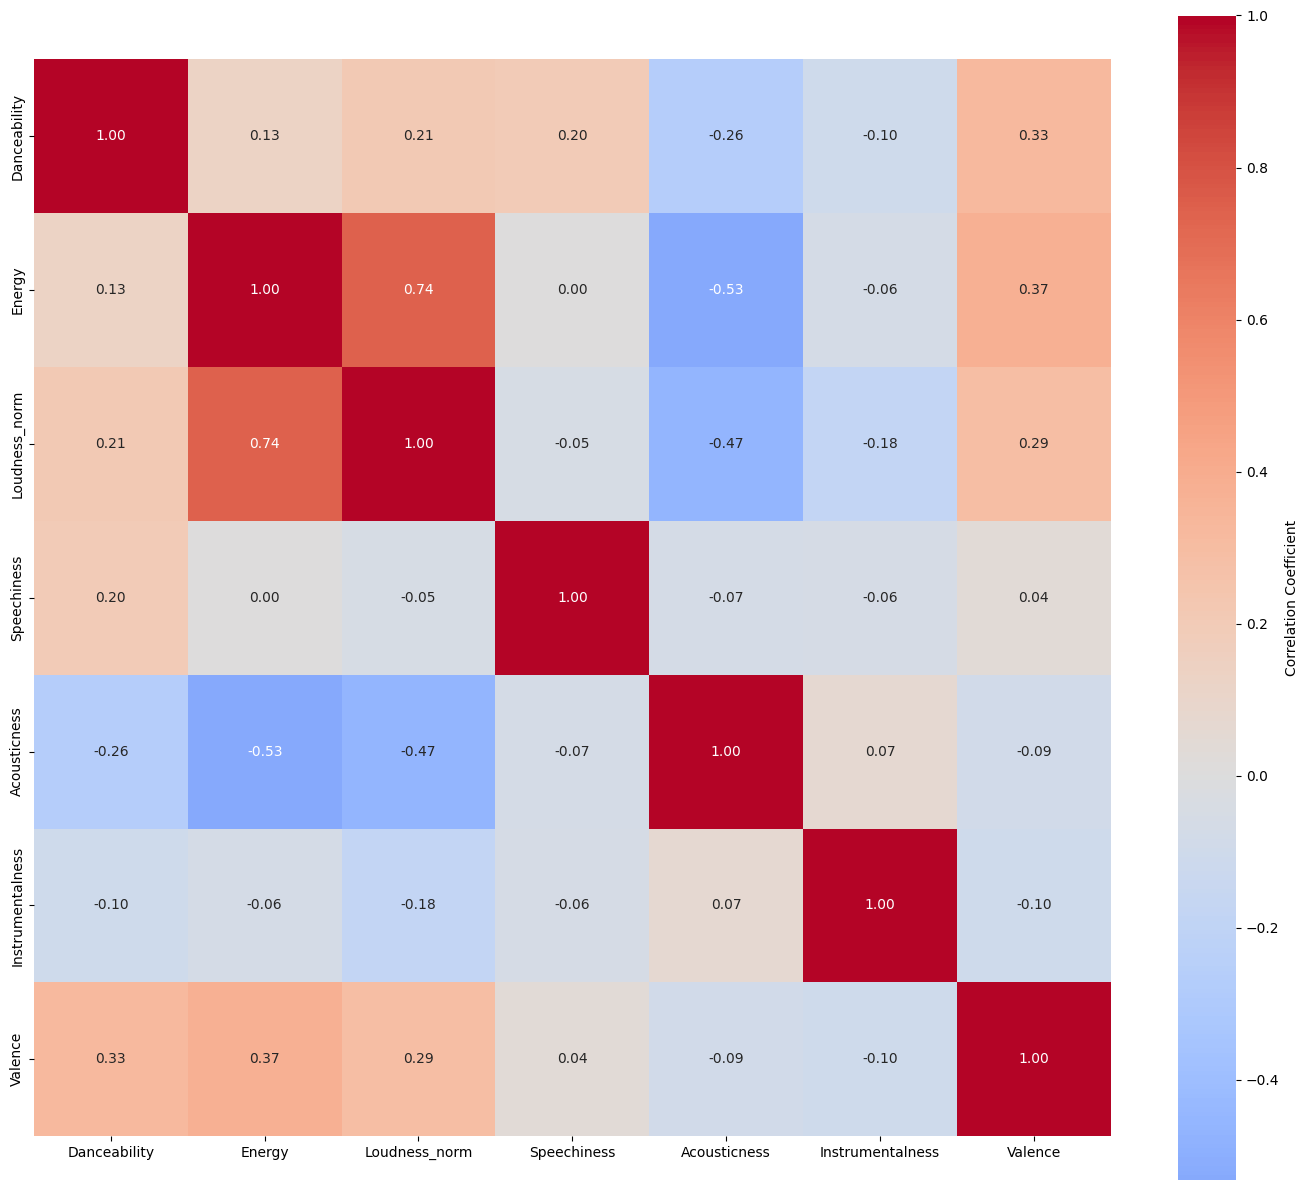

In [75]:
plt.figure(figsize=(14, 12))
sns.heatmap(features_normal.corr(),
            annot=True,
            cmap = 'coolwarm',
            center=0,
            fmt='.2f',
            square=True,
            cbar_kws={'label': 'Correlation Coefficient'})
            
plt.tight_layout()
plt.show()
    # Create heatmap




In [76]:


inertia = []
K = np.arange(1,11)
for k in K:
 kmeanModel = KMeans(n_clusters=k).fit(features_normal)
 kmeanModel.fit(features_normal)
 inertia.append(kmeanModel.inertia_)

In [77]:
inertia

[1862.6078772996098,
 1320.351940750269,
 1011.0281857165569,
 922.4456976218487,
 827.1232595864119,
 764.9278179836583,
 722.9358573458035,
 697.1414854806992,
 661.4344604170383,
 641.7104825021441]

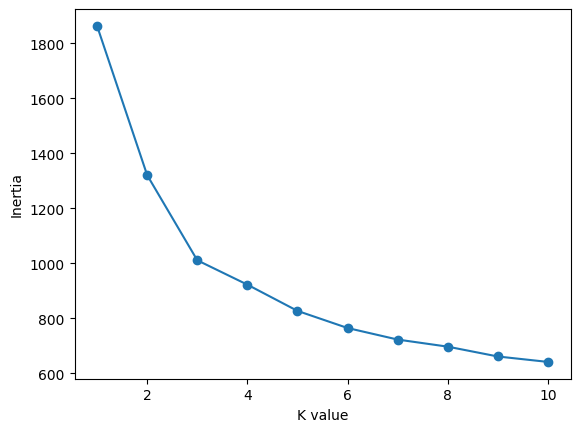

In [78]:
fig,ax = plt.subplots(1,1)
# Create a line plot
ax.plot([1,2,3,4,5,6,7,8,9,10], inertia,marker='o', linestyle='-')
ax.set_xlabel('K value')
ax.set_ylabel('Inertia')
# Show the plot
plt.show()

Let's try with K=4 First

In [79]:
k_means_4 = KMeans(n_clusters=4).fit(features_normal)
audio_features['cluster_4'] = k_means_4.fit_predict(features_normal)
tracks_clustered = audio_features.reset_index(drop=True)

In [80]:
tracks_clustered

,id,Danceability,Energy,Loudness_norm,Speechiness,Acousticness,Instrumentalness,Valence,cluster_4
0,000xQL6tZNLJzIrtIgxqSl,0.748,0.627,0.825120,0.064,0.131,0.0,0.524,3
1,003VDDA7J3Xb2ZFlNx7nIZ,0.842,0.578,0.824511,0.138,0.004,0.0,0.190,0
2,003eoIwxETJujVWmNFMoZy,0.353,0.755,0.817955,0.733,0.082,0.0,0.437,0
3,003vvx7Niy0yvhvHt4a68B,0.352,0.911,0.848296,0.075,0.001,0.0,0.236,0
4,00B7TZ0Xawar6NZ00JFomN,0.620,0.625,0.784249,0.553,0.287,0.0,0.665,1
...,...,...,...,...,...,...,...,...,...
9156,7zjEyeBsaw9gV0jofJLfOM,0.767,0.313,0.650210,0.080,0.838,0.0,0.765,1
9157,7zl7kehxesNEo2pYkKXTSe,0.924,0.730,0.822335,0.274,0.053,0.0,0.848,3
9158,7znO2T2deQ7nZUbyxEAMDB,0.570,0.535,0.803626,0.212,0.264,0.0,0.073,0
9159,7zvfDihYiJ8RQ1nRcpKBF5,0.727,0.530,0.750080,0.312,0.283,0.0,0.258,0


In [81]:
tracks_clustered['cluster_4'].value_counts()

cluster_4
0    3538
3    3116
1    1396
2    1111
Name: count, dtype: int64

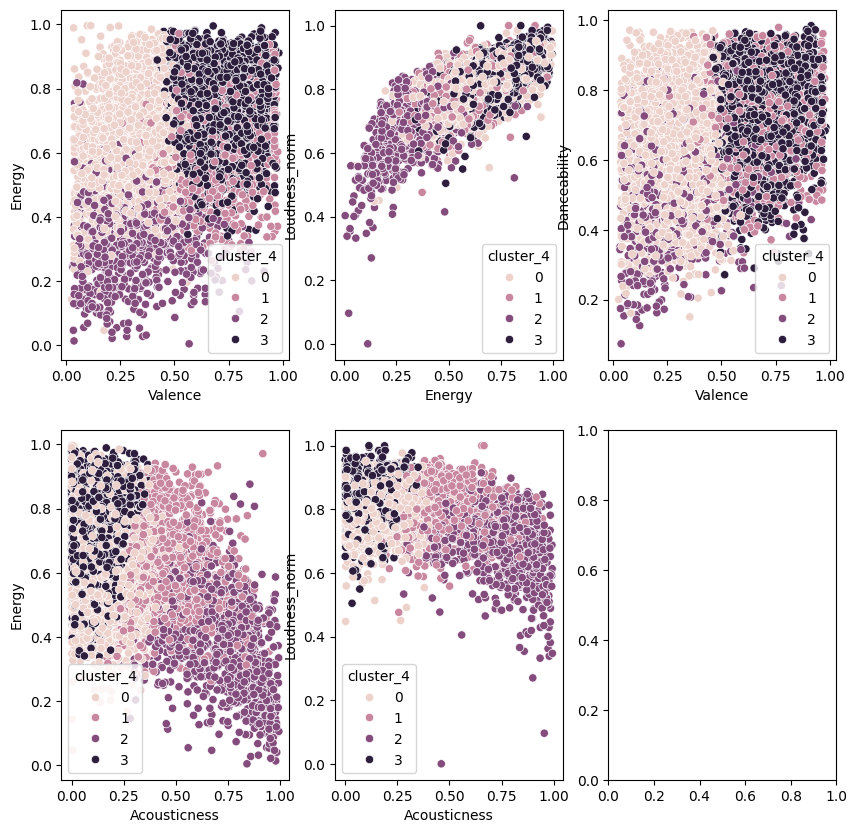

In [82]:

important_pairs = [
    ('Valence', 'Energy'),
    ('Energy', 'Loudness_norm'), 
    ('Valence', 'Danceability'),
    ('Acousticness', 'Energy'),
    ('Acousticness', 'Loudness_norm')
]

fig, axes = plt.subplots(2, 3, figsize=(10, 10))
for idx, (feat1, feat2) in enumerate(important_pairs):
    row, col = idx // 3, idx % 3
    sns.scatterplot(data=audio_features, x=feat1, y=feat2, hue='cluster_4', ax=axes[row, col])

Plot 2 features

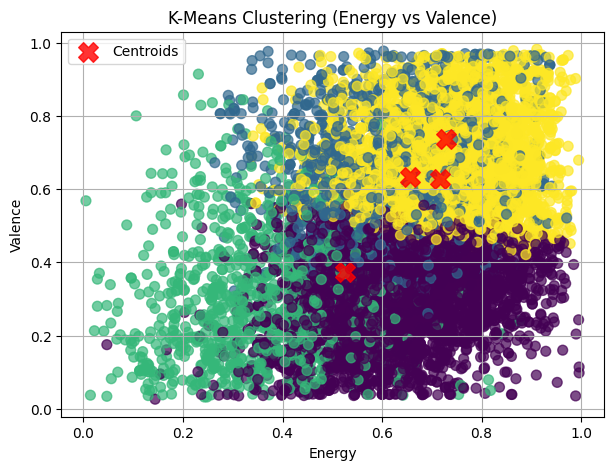

In [83]:
plt.figure(figsize=(7, 5))
plt.scatter(tracks_clustered['Energy'], tracks_clustered['Valence'],
            c=tracks_clustered['cluster_4'], cmap='viridis', s=50, alpha=0.7)
centers = scaler.inverse_transform(k_means_4.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1],
            c='red', s=200, alpha=0.8, marker='X', label='Centroids')
 
plt.title('K-Means Clustering (Energy vs Valence)')
plt.xlabel('Energy')
plt.ylabel('Valence')
plt.legend()
plt.grid(True)
plt.show()

Plot every features (Applying PCA)

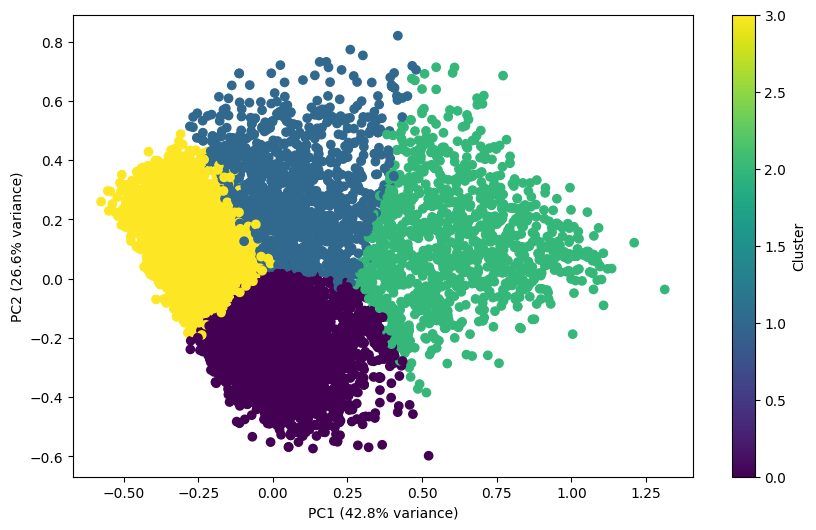

In [84]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_normal)
# fatures_normal Dataframe with 7 features

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=tracks_clustered['cluster_4'], cmap='viridis')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')

plt.colorbar(scatter, label='Cluster')

In [85]:
print("\nCluster Centers (Original Scale):")
for i, center in enumerate(centers):
    print(f"Cluster {i}: Energy={center[0]:.3f}, Valence={center[1]:.3f}")
 
print("\nNumber of items in each cluster:")
print(tracks_clustered['cluster_4'].value_counts())


Cluster Centers (Original Scale):
Cluster 0: Energy=0.656, Valence=0.633
Cluster 1: Energy=0.716, Valence=0.627
Cluster 2: Energy=0.525, Valence=0.375
Cluster 3: Energy=0.729, Valence=0.737

Number of items in each cluster:
cluster_4
0    3538
3    3116
1    1396
2    1111
Name: count, dtype: int64


Check each group 

In [86]:
#df[df['id'].isin(id_series)]

Let's try with k =3

In [87]:
df

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Loudness_norm
0,1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023-05-29,0.668,0.758,-5.176,0.033,0.483,0.000,...,Artist 1,Eslabon Armado,Nationality 1,Mexico,Latin-America,200,100.0,3qQbCzHBycnDpGskqOWY0E,https://open.spotify.com/track/3qQbCzHBycnDpGs...,0.849862
1,2,WHERE SHE GOES,Bad Bunny,2023-05-29,0.652,0.800,-4.019,0.061,0.143,0.629,...,Artist 1,Bad Bunny,Nationality 1,Puerto Rico,Latin-America,199,199.0,7ro0hRteUMfnOioTFI5TG1,https://open.spotify.com/track/7ro0hRteUMfnOio...,0.883423
2,3,La Bebe - Remix,"Yng Lvcas, Peso Pluma",2023-05-29,0.812,0.479,-5.678,0.333,0.213,0.000,...,Artist 1,Yng Lvcas,Nationality 1,Mexico,Latin-America,198,99.0,2UW7JaomAMuX9pZrjVpHAU,https://open.spotify.com/track/2UW7JaomAMuX9pZ...,0.835301
3,4,Cupid - Twin Ver.,FIFTY FIFTY,2023-05-29,0.783,0.592,-8.332,0.033,0.435,0.000,...,Artist 1,FIFTY FIFTY,Nationality 1,South Korea,Asia,197,197.0,7FbrGaHYVDmfr7KoLIZnQ7,https://open.spotify.com/track/7FbrGaHYVDmfr7K...,0.758318
4,5,un x100to,"Grupo Frontera, Bad Bunny",2023-05-29,0.569,0.724,-4.076,0.047,0.228,0.000,...,Artist 1,Grupo Frontera,Nationality 1,Mexico,Latin-America,196,98.0,6pD0ufEQq0xdHSsRbg9LBK,https://open.spotify.com/track/6pD0ufEQq0xdHSs...,0.881769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467056,123,Photograph,Ed Sheeran,2017-01-01,0.614,0.379,-10.480,0.048,0.607,0.000,...,Artist 1,Ed Sheeran,Nationality 1,United Kingdom,Europe,78,78.0,6fxVffaTuwjgEk5h9QyRjy,https://open.spotify.com/track/6fxVffaTuwjgEk5...,0.696012
467057,148,Dynamite (feat. Pretty Sister),Nause,2017-01-01,0.811,0.801,-6.000,0.080,0.055,0.000,...,Artist 1,Nause,Nationality 1,Sweden,Europe,53,53.0,2Ae5awwKvQpTBKQHr1TYCg,https://open.spotify.com/track/2Ae5awwKvQpTBKQ...,0.825961
467058,157,Love On The Brain,Rihanna,2017-01-01,0.509,0.637,-4.830,0.047,0.072,0.000,...,Artist 1,Rihanna,Nationality 1,Barbados,Anglo-America,44,44.0,2aksifNn5ph8igDOkPBA02,https://open.spotify.com/track/2aksifNn5ph8igD...,0.859898
467059,158,Desde Esa Noche (feat. Maluma),Thalia,2017-01-01,0.780,0.929,-0.739,0.053,0.171,0.000,...,Artist 1,Thalia,Nationality 1,Mexico,Latin-America,43,43.0,1pWYnQIlqxTh5bxuPmTG4E,https://open.spotify.com/track/1pWYnQIlqxTh5bx...,0.978564


In [88]:
k_mean_3 = KMeans(n_clusters=3, random_state=42)
audio_features['cluster_3'] = k_mean_3.fit_predict(features_normal)
tracks_clustered = audio_features.reset_index(drop=True)
centers_3 = scaler.inverse_transform(k_mean_3.cluster_centers_)


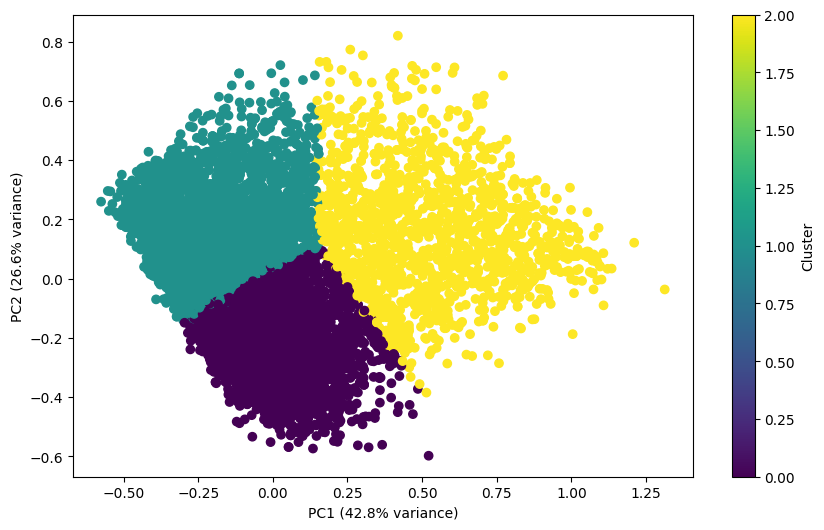

In [89]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_normal)
# fatures_normal Dataframe with 7 features

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=audio_features['cluster_3'], cmap='viridis')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')

plt.colorbar(scatter, label='Cluster')

In [90]:
print("\nCluster Centers (Original Scale):")
for i, center_3 in enumerate(centers_3):
    print(f"Cluster {i}: Energy={center_3[0]:.3f}, Valence={center_3[1]:.3f}")
 
print("\nNumber of items in each cluster:")
print(tracks_clustered['cluster_3'].value_counts())


Cluster Centers (Original Scale):
Cluster 0: Energy=0.659, Valence=0.639
Cluster 1: Energy=0.732, Valence=0.719
Cluster 2: Energy=0.569, Valence=0.424

Number of items in each cluster:
cluster_3
1    3824
0    3793
2    1544
Name: count, dtype: int64


In [91]:
from sklearn.metrics import silhouette_score


silhouette_3 = silhouette_score(features_normal, audio_features['cluster_3'])
silhouette_4 = silhouette_score(features_normal, audio_features['cluster_4'])
print(f"Silhouette score (k=3): {silhouette_3:.3f}")
print(f"Silhouette score (k=4): {silhouette_4:.3f}")

Silhouette score (k=3): 0.258
Silhouette score (k=4): 0.235


In [92]:
from sklearn.metrics import calinski_harabasz_score

ch_score_4 = calinski_harabasz_score(features_normal, audio_features['cluster_4'])
ch_score_3 = calinski_harabasz_score(features_normal, audio_features['cluster_3'])

print(f"Calinski-Harabasz Score (k=4): {ch_score_4:.3f}")
print(f"Calinski-Harabasz Score (k=3): {ch_score_3:.3f}")

Calinski-Harabasz Score (k=4): 3191.400
Calinski-Harabasz Score (k=3): 3856.878


In [96]:
id_series = tracks_clustered[tracks_clustered['cluster_3'] == 2]['id']
df[df['id'].isin(id_series)]

,Rank,Title,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,Loudness_norm
6,7,Daylight,David Kushner,2023-05-29,0.508,0.430,-9.475,0.034,0.830,0.000,...,Artist 1,David Kushner,Nationality 1,United States,Anglo-America,194,194.0,1odExI7RdWc4BT515LTAwj,https://open.spotify.com/track/1odExI7RdWc4BT5...,0.725163
9,10,TQG,"KAROL G, Shakira",2023-05-29,0.720,0.630,-3.547,0.277,0.673,0.000,...,Artist 1,KAROL G,Nationality 1,Colombia,Latin-America,191,95.5,0DWdj2oZMBFSzRsi2Cvfzf,https://open.spotify.com/track/0DWdj2oZMBFSzRs...,0.897114
17,20,Last Night,Morgan Wallen,2023-05-29,0.492,0.675,-5.456,0.039,0.467,0.000,...,Artist 1,Morgan Wallen,Nationality 1,United States,Anglo-America,181,181.0,7K3BhSpAxZBznislvUMVtn,https://open.spotify.com/track/7K3BhSpAxZBznis...,0.841740
18,21,BESO,"ROSALÍA, Rauw Alejandro",2023-05-29,0.768,0.644,-6.671,0.136,0.736,0.001,...,Artist 1,ROSALÍA,Nationality 1,Spain,Europe,180,90.0,609E1JCInJncactoMmkDon,https://open.spotify.com/track/609E1JCInJncact...,0.806497
24,27,Acróstico,Shakira,2023-05-29,0.748,0.478,-8.886,0.121,0.837,0.000,...,Artist 1,Shakira,Nationality 1,Colombia,Latin-America,174,174.0,7txjUEY6McJDJKqIo1Rxjp,https://open.spotify.com/track/7txjUEY6McJDJKq...,0.742248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467018,87,Photograph,Ed Sheeran,2017-01-03,0.614,0.379,-10.480,0.048,0.607,0.000,...,Artist 1,Ed Sheeran,Nationality 1,United Kingdom,Europe,114,114.0,6fxVffaTuwjgEk5h9QyRjy,https://open.spotify.com/track/6fxVffaTuwjgEk5...,0.696012
467032,62,"i hate u, i love u (feat. olivia o'brien)",gnash,2017-01-02,0.492,0.275,-13.400,0.300,0.687,0.000,...,Artist 1,gnash,Nationality 1,United States,Anglo-America,139,139.0,7vRriwrloYVaoAe3a9wJHe,https://open.spotify.com/track/7vRriwrloYVaoAe...,0.611313
467036,91,Photograph,Ed Sheeran,2017-01-02,0.614,0.379,-10.480,0.048,0.607,0.000,...,Artist 1,Ed Sheeran,Nationality 1,United Kingdom,Europe,110,110.0,6fxVffaTuwjgEk5h9QyRjy,https://open.spotify.com/track/6fxVffaTuwjgEk5...,0.696012
467052,77,"i hate u, i love u (feat. olivia o'brien)",gnash,2017-01-01,0.492,0.275,-13.400,0.300,0.687,0.000,...,Artist 1,gnash,Nationality 1,United States,Anglo-America,124,124.0,7vRriwrloYVaoAe3a9wJHe,https://open.spotify.com/track/7vRriwrloYVaoAe...,0.611313
